# Group Assignment 1.5. Gaussian & Furious

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Patricia Mares Nasarre*

*Due: Friday, October 3rd, 2025.*

## Part 1: Introduction and set up

In this assignment, you will work with data on passing maneuvers from a fixed-based driving simulator experiment (you can read more about it [here](https://doi.org/10.1016/j.iatssr.2016.07.001)!) to assess the safety of these maneuvers. This type of analysis is key to better understand conflicts between drivers and better estimate possible crashes.

To do so, you will use data with three random variables:
- The speed of the passing vehicle ($S$, m/s)
- Gap from the passing vehicle to the front of the passed vehicle at the end of the maneuver ($d$, m)
- The duration of the pass maneuver ($P$, s)



In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
import matplotlib.pyplot as plt
from statistics import mean, stdev
import os
from urllib.request import urlretrieve
import seaborn as sns

In [2]:
def findfile(fname):
    if not os.path.isfile(fname):
        print(f"Downloading {fname}...")
        urlretrieve('http://files.mude.citg.tudelft.nl/'+fname, fname)

findfile('modif_data_passing.csv')

In [5]:
data = np.loadtxt('modif_data_passing.csv', delimiter = ',', skiprows=1)
data

array([[18.18, 11.34,  5.48],
       [26.53, 46.06,  5.25],
       [22.09, 33.28,  2.6 ],
       ...,
       [23.84, 28.21,  6.3 ],
       [21.93, 15.86,  5.01],
       [21.91, 20.64,  5.91]])

## Part 2: Data exploration

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.1:}$
    
Plot the data: have a look at the histograms of each variable as well as the scatter plots of each of them against the other. What can you conclude from those? 
    
</p>
</div>

In [ ]:
### YOUR CODE LINES HERE

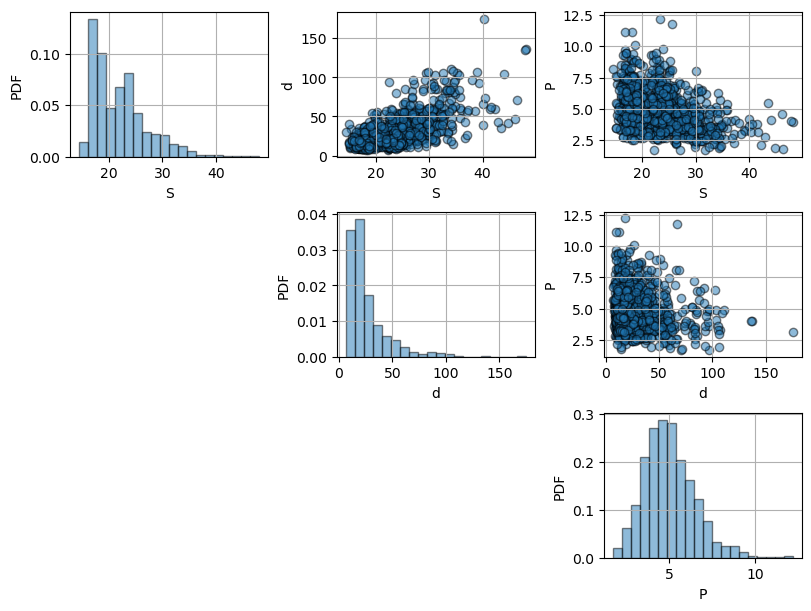

In [19]:
variable_names = ['S', 'd', 'P']
fig, axs = plt.subplots(3, 3, figsize=(8, 6), layout = 'constrained')

for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        if i == j:
            axs[i,j].grid()
            axs[i, j].hist(data[:, i], bins=20, density=True, alpha=0.5, edgecolor='black')
            axs[i, j].set_xlabel(variable_names[i])
            axs[i,j].set_ylabel('PDF')
        if i < j:
            axs[i,j].grid()
            axs[i, j].scatter(data[:, i], data[:, j], alpha=0.5, edgecolor='black')
            axs[i, j].set_xlabel(variable_names[i])
            axs[i, j].set_ylabel(variable_names[j])
        if i > j:
            axs[i, j].axis('off')

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 2.1:}$

From the histograms, we can see that the three variables seem to be right-skewed as they have a positive tail. This is specially noteworthy for $S$ and $d$.
From the scatter plots, we can see that $S$ and $d$ are positively correlated with a relevant strong correlation, while $d$ and $P$ and $S$ and $P$ seem to be negatively correlated with a weaker correlation.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.2:}$
    
Quantify the stregth of the correlation between each pair of variables using Pearson's correlation coefficient. What can you conclude? 
    
</p>
</div>

In [ ]:
### YOUR CODE LINES HERE

In [20]:
def calculate_covariance(X1, X2):
    mean_x1 = mean(X1)
    mean_x2 = mean(X2)
    diff_x1 = [item-mean_x1 for item in X1]
    diff_x2 = [item-mean_x2 for item in X2]
    product = [a*b for a,b in zip(diff_x1,diff_x2)]
    covariance = mean(product)
    return covariance

def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(stdev(X1)*stdev(X2))
    return correl_coeff

print("Pearson's correlation coefficient between S and d is", 
      np.round(pearson_correlation(data[:,0], data[:,1]), 2))

print("Pearson's correlation coefficient between S and P is", 
      np.round(pearson_correlation(data[:,0], data[:,2]), 2))

print("Pearson's correlation coefficient between P and d is", 
      np.round(pearson_correlation(data[:,1], data[:,2]), 2))

Pearson's correlation coefficient between S and d is 0.68
Pearson's correlation coefficient between S and P is -0.36
Pearson's correlation coefficient between P and d is -0.19


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 2.2:}$

As expected from the first observation of the data, we can see that $S$ and $d$ are positively correlated with a reasonably strong correlation of 0.68, while $S$ and $P$ and $d$ and $P$ are negatively correlated with weaker correlations of -0.36 and 0.19, respectively. 

This means, that the higher the speed of the passing vehicle ($S$), we can expect a shorter duration of the passing maneuver ($P$) and a higher distance from the passing vehicle to the front of the passed vehicle at the end of the maneuver ($d$).

## Part 3: Multivariate Gaussian distribution

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.1:}$
    
Model the joint distribution of $S$, $d$ and $P$ using a multivariate Gaussian distribution. Follow the steps:
- Define the vector of means
- Define the covariance matrix
- Define the bivariate Gaussian distribution and draw 100 samples to compare with the observations.
  
Do you see differences between the observations and the samples from the bivariate Gaussian distribution? Compare both the univariate distributions and the bivariate scatter plots.
    
</p>
</div>

In [21]:
# Define the vector of means
mu1 = ### YOUR CODE HERE ###
mu2 = ### YOUR CODE HERE ###
mu3 = ### YOUR CODE HERE ###

mu = [mu1, mu2, mu3] #vector of means

# Define the covariance matrix
s1 = ### YOUR CODE HERE ###
s2 = ### YOUR CODE HERE ###
s3 = ### YOUR CODE HERE ###
covariance_12 = ### YOUR CODE HERE ###
covariance_13 = ### YOUR CODE HERE ###
covariance_23 = ### YOUR CODE HERE ###
sigma = ### YOUR CODE HERE ###

# Draw 100 samples from a bivariate Gaussian distribution
samples = ### YOUR CODE HERE ###

# Scatter plot against observations

### YOUR CODE LINES HERE

SyntaxError: invalid syntax (946226686.py, line 2)

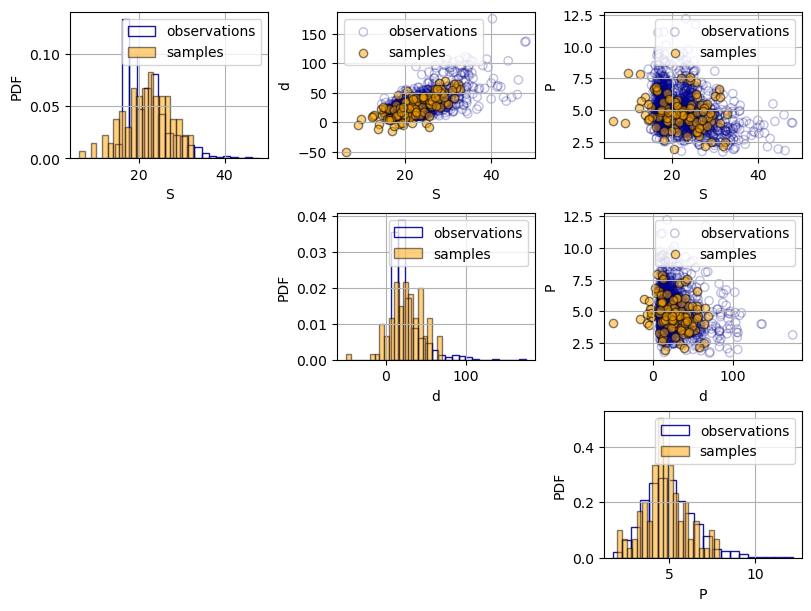

In [36]:
# Define the vector of means
mu1 = mean(data[:,0])
mu2 = mean(data[:,1])
mu3 = mean(data[:,2])

mu = [mu1, mu2, mu3] #vector of means

# Define the covariance matrix
s1 = stdev(data[:,0])
s2 = stdev(data[:,1])
s3 = stdev(data[:,2])
covariance_12 = calculate_covariance(data[:,0], data[:,1])
covariance_13 = calculate_covariance(data[:,0], data[:,2])
covariance_23 = calculate_covariance(data[:,1], data[:,2])
sigma = np.array([[s1**2 , covariance_12, covariance_13], [covariance_12, s2**2, covariance_23], [covariance_13, covariance_23, s3**2]])

# Draw 100 samples from a bivariate Gaussian distribution
samples = multivariate_normal(mean=mu, cov=sigma).rvs(size=100)

# Plot against observations

fig, axs = plt.subplots(3, 3, figsize=(8, 6), layout = 'constrained')

for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        if i == j:
            axs[i,j].grid()
            axs[i, j].hist(data[:, i], bins=20, density=True, alpha=0.9, edgecolor='darkblue', facecolor = 'none')
            axs[i, j].hist(samples[:, i], bins=20, density=True, alpha=0.5, edgecolor='black',facecolor='orange')
            axs[i, j].set_xlabel(variable_names[i])
            axs[i,j].set_ylabel('PDF')
            axs[i,j].legend(['observations', 'samples'])
        if i < j:
            axs[i,j].grid()
            axs[i, j].scatter(data[:, i], data[:, j], alpha=0.25, edgecolor='darkblue', facecolor='none')
            axs[i, j].scatter(samples[:, i], samples[:, j], alpha=0.5, edgecolor='black',facecolor='orange')
            axs[i, j].set_xlabel(variable_names[i])
            axs[i, j].set_ylabel(variable_names[j])
            axs[i, j].legend(['observations', 'samples'])
        if i > j:
            axs[i, j].axis('off')

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 3.1:}$

A key property of using a multivariate Gaussian distribution is that both the marginal distributions (the distribution of each of the random variables) and the joint distribution are Gaussian. Therefore, as it can be observed in the histograms, the samples present a symmetric bell-shaped distribution, while the observation have a right tail. This behavior cannot be captured using a Gaussian distribution.

Regarding the bivariate plots, the samples seem to capture the strength of the dependence in the observations, However, the shape of the dependence of the samples is more elliptical, while in some pairs that does not fully hold (e.g.: plot $S$ and $P$).

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.2:}$

Now that you have a model, you want to get insights into how safe is the circulation in the road you are studying. In previous studies in a similar area, they have defined the following safety thresholds $^*$:
- High speeds lead to reduced driver's reaction time and increased stopping distances. Therefore, $S < 30 \ m/s$ is recommended.
- Reduced distances between the passing and passed vehicle after the maneuver may indicate more risky maneuvers increasing the chance of collision. Thus, $d>45 \ m$ are recommended.
- Long passing times may lead to dangerous situations as it increases the likelihood of the passing maneuver ending in a no-passing zone due to traffic, road conditions, between others. Hence, $P<7 \ s$ are recommended.

Given the above safety thresholds, what is the probability of meeting them?

*Hint: It can be computed analytically similarly to the 2-dimensional case. However, it is easier to use simulations to compute this probability*.

$^*$ *This thresholds are not based in actual evidence and are just for academic purposes.*
</p>
</div>

In [ ]:
# Draw 10000 samples from the multivariate Gaussian distribution
samples = ### YOUR CODE LINES HERE

# Count number of points that meet the condition
condition = ### YOUR CODE LINES HERE

# Compute the probability of the condition
prob_meeting_condition = ### YOUR CODE LINES HERE
print(f"The probability of meeting the safety limits (S < 30, d > 45 and P < 7) is approximately {prob_meeting_condition:.4f}")

In [40]:
# Draw 10000 samples from the multivariate Gaussian distribution
samples = multivariate_normal(mean=mu, cov=sigma).rvs(size=10000)

# Count number of points that meet the condition
condition = sum(np.logical_and(samples[:, 0] < 30, samples[:, 1] > 45, samples[:,2]<7))

# Compute the probability of the condition
prob_meeting_condition = condition / 10000
print(f"The probability of meeting the safety limits (S < 30, d > 45 and P < 7) is approximately {prob_meeting_condition:.4f}")

The probability of meeting the safety limits (S < 30, d > 45 and P < 7) is approximately 0.1135


## Part 4: Conditionalizing the multivariate Gaussian distribution

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 4.1:}$

You have now installed a sensor that measures the distance between the passed and passing vehicle at the end of the maneuver ($d$). For a passing vehicle, $d=53 \ m$. What is the probability that it was a safe maneuver? 

To answer the question, follow the steps:
1. Compute the distribution of $S$ and $P$ given $d=53 \ m$.
2. Compute the probability of $P(S \leq 30 \ m/s, P \leq 7 \ s|d=53 \ m)$.
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 4.1:}$
One of the properties of the multivariate Gaussian distribution is that, when we conditionalize, we always obtain another Gaussian distribution. Here, we are working with a 3-dimensional distribution and we are conditionalizing on one variable ($d$). Therefore, we will obtain a bivariate Gaussian distribution for $S$ and $P$. But which one?

We can compute the (new) parameters of the conditional distribution of $S$ and $P$ using the following expressions (note that they assume that the conditioning variable is $X_3$):

$$
\hat{\mu} = \begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix} + \begin{pmatrix} \Sigma_{13} \\ \Sigma_{23} \end{pmatrix} \Sigma_{33}^{-1} (a - \mu_3) = \begin{pmatrix} 22.2 \\ 5.0 \end{pmatrix} + \begin{pmatrix} 69.5 \\ -5.2 \end{pmatrix} (19^2)^{-1} (53 - 26.1)=\begin{pmatrix} 27.4 \\ 4.6 \end{pmatrix}
$$

$$
\hat{\Sigma} = \begin{pmatrix} \Sigma_{11} \Sigma_{12} \\ \Sigma_{21} \Sigma_{22} \end{pmatrix} - \begin{pmatrix} \Sigma_{13} \\ \Sigma_{23} \end{pmatrix} \Sigma_{33}^{-1} \begin{pmatrix} \Sigma_{13} \ \Sigma_{23}\end{pmatrix} = \begin{pmatrix} 5.3^2 \ \ (-2.8) \\ (-2.8)\ \  1.5^2 \end{pmatrix} - \begin{pmatrix} 69.5 \\ -5.2 \end{pmatrix} (19^2)^{-1} \begin{pmatrix} 69.5 \ -5.2\end{pmatrix} = \begin{pmatrix} 14.7 \ -1.8 \\ -1.8 \ \ \ 2.18\end{pmatrix}
$$

Note that the covariance matrix for the conditioned distribution reduces to the conditional variance of $DIP$. This is because we have a bivariate distribution, so given the value of one variable, the resulting conditional distribution is univariate. However, if we had been working with a distribution of 3 variables, when conditionalizing in one, we would have obtained a conditional bivariate distribution.
</p></div>

In [ ]:
cond_mu_vector = ### YOUR CODE LINES HERE
cond_sigma_matrix = ### YOUR CODE LINES HERE

In [68]:
# Compute the parameters of the conditional distribution
cond_mu_vector = np.array([22.2, 5.0]) + np.multiply(np.multiply(np.array([69.5, -5.2]), (19**2)**(-1)),(53 - 26.1))
cond_sigma_matrix = np.array([[5.3**2, -2.8], [-2.8,  1.5**2]]) - np.multiply(np.multiply(np.array([69.5, -5.2]), (19**2)**(-1)), np.array([[69.5], [-5.2]]))

# Compute the conditional probability
cond_prob = multivariate_normal(mean=cond_mu_vector, cov=cond_sigma_matrix).cdf([30, 7])
print('The conditional probability of S < 30 and P < 7 given d = 53 is approximately {:.4f}'.format(cond_prob))

The conditional probability of S < 30 and P < 7 given d = 53 is approximately 0.7044


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 4.2:}$

Using the results of the previous task, compare the conditional and unconditional distributions of $S$ and $P$. To do so, follow the next steps:
1. Plot the conditional and unconditional univariate marginal distributions of $S$ and $P$.
2. Plot the contours of the PDF of the conditional and unconditional joint distributions of $S$ and $P$. 
3. Explain the differences in terms of both the location and the width of the distribution.
</p>
</div>


In [ ]:
# Compare the conditional and unconditional margins

# Evaluate both the conditional and unconditional univariate PDFs of S and P
### YOUR CODE LINES HERE

# Plot both PDFs
### YOUR CODE LINES HERE

In [ ]:
# Compare the joint conditional and unconditional distribution

# Define the mesh of values where we want to evaluate the random variables
#already done in previous cell

# Define the grid
X1,X2 = ### YOUR CODE LINES HERE
X = ### YOUR CODE LINES HERE

# Evaluate the CDF
Z_uncond = ### YOUR CODE LINES HERE
Z_cond = ### YOUR CODE LINES HERE

# Create contours plot
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
contours = ax.contour(X1, X2, Z_uncond.reshape(X1.shape), 25, cmap='YlGnBu', vmin=0, vmax = 0.03, label = 'Unconditional joint PDF')
contours = ax.contour(X1, X2, Z_cond.reshape(X1.shape), 25, cmap='YlGnBu', vmin=0, vmax = 0.03, label = 'Conditional joint PDF')
ax.grid()
ax.set_xlim([0, 50])
ax.set_xlim([0, 50])
ax.set_ylim([0, 14])
ax.set_xlabel('${S} [m/s]$')
ax.set_ylabel('${P} [s]$')
fig.colorbar(contours, ax=ax, label='Probability Density')

In [100]:
print(mu3)
print(cond_mu_vector[1])

4.981297591297591
4.612520775623269


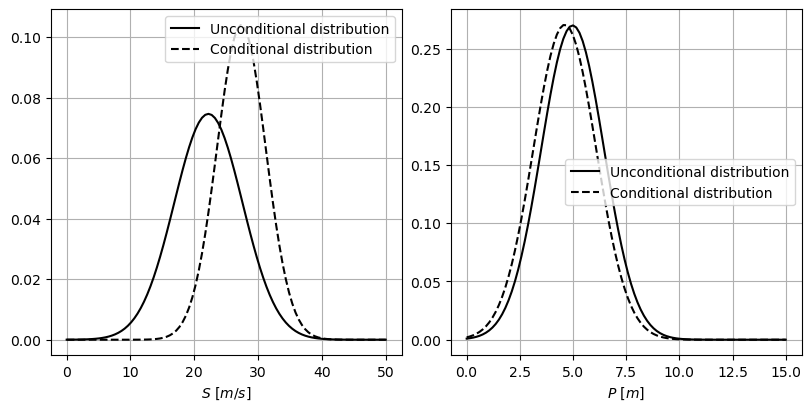

In [74]:
# Compare the conditional and unconditional margins

# Evaluate both the conditional and unconditional univariate PDFs of S and P
values_S = np.linspace(0, 50, 100)
uncond_S_pdf = norm.pdf(values_S, loc = mu1, scale = s1)
cond_S_pdf = norm.pdf(values_S, loc = cond_mu_vector[0], scale = cond_sigma_matrix[0,0]**(0.5))

values_P = np.linspace(0, 15, 100)
uncond_P_pdf = norm.pdf(values_P, loc = mu3, scale = s3)
cond_P_pdf = norm.pdf(values_P, loc = cond_mu_vector[1], scale = cond_sigma_matrix[1,1]**(0.5))

# Plot both PDFs
fig, ax = plt.subplots(1, 2, figsize=(8, 4), layout = 'constrained')
ax[0].plot(values_S, uncond_S_pdf, 'k', label = 'Unconditional distribution')
ax[0].plot(values_S, cond_S_pdf, '--k', label = 'Conditional distribution')
ax[0].grid()
ax[0].set_xlabel('pdf')
ax[0].set_xlabel('${S} \ [m/s]$')
ax[0].legend()

ax[1].plot(values_P, uncond_P_pdf, 'k', label = 'Unconditional distribution')
ax[1].plot(values_P, cond_P_pdf, '--k', label = 'Conditional distribution')
ax[1].grid()
ax[1].set_xlabel('pdf')
ax[1].set_xlabel('${P} \ [m]$')
ax[1].legend()

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 4.2a:}$
In the plots above, it is possible to see the influence of the conditionalization in the univariate marginals, $S$ and $P$. We have conditionalized $d$ in a value above its mean. Since the correlation between $d$ and $S$ is positive, the distribution of $S$ moves towards positive values; increasing values of $d$ imply also higher values of $S$. Also, the conditional distribution of $S$ becomes narrower as the model has more information. 

On the other hand, $P$ is not strongly correlated to $d$, presenting a weak negative correlation ($\rho_{d,P}=-0.19$). Therefore, the marginal distribution does not suffer a change as noteworthy as the distribution of $S$. Although it is difficult to distinguish from the plot, the standard deviation of $P$ gets slightly reduced and the distribution shifts towards negative values; increasing values of $d$ imply decreasing values of $P$.
</p></div>

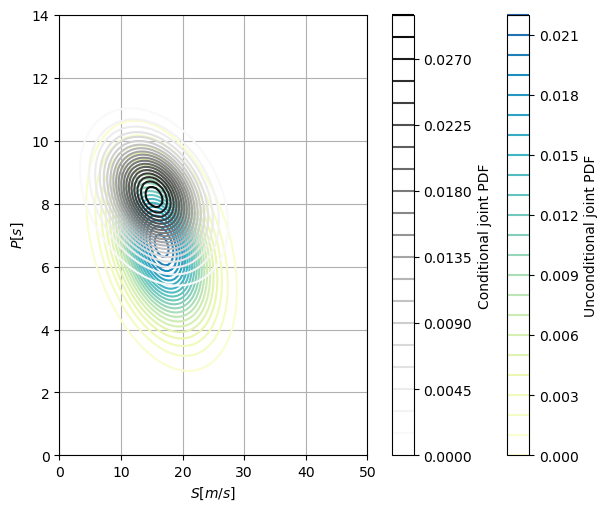

In [113]:
# Compare the joint conditional and unconditional distribution

# Define the mesh of values where we want to evaluate the random variables
#already done in previous cell

# Define the grid
X1,X2 = np.meshgrid(values_S,values_P)
X = np.array([np.concatenate(X1.T), np.concatenate(X2.T)]).T

# Evaluate the CDF
Z_uncond = multivariate_normal(mean=[mu[0], mu[2]], cov=[[sigma[0][0], sigma[0][2]],[sigma[2][0], sigma[2][2]]]).pdf(X)
Z_cond = multivariate_normal(mean=cond_mu_vector, cov=cond_sigma_matrix).pdf(X)

# Create contours plot
fig = plt.figure(figsize=(6,5), layout= 'constrained')
ax = fig.add_subplot(111)
contours = ax.contour(X1, X2, Z_uncond.reshape(X1.shape), 25, cmap='YlGnBu', vmin=0, vmax = 0.03)
contours2 = ax.contour(X1, X2, Z_cond.reshape(X1.shape), 25, cmap='Greys', vmin=0, vmax = 0.03)
ax.grid()
# ax.legend(['Unconditional joint PDF', 'Conditional joint PDF'])
ax.set_xlim([0, 50])
ax.set_xlim([0, 50])
ax.set_ylim([0, 14])
ax.set_xlabel('${S} [m/s]$')
ax.set_ylabel('${P} [s]$')
fig.colorbar(contours, ax=ax, label='Unconditional joint PDF')
fig.colorbar(contours2, ax=ax, label = 'Conditional joint PDF')

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 4.2b:}$
In the plot above, it is possible to see the influence of the conditionalization in the bivariate marginal $S$ and $P$. You can see how, similarly to the marginal plots, the mean of $P$ moves 
</p></div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
End of solution.
</p>
</div>

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2025 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>